In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create the dataset

In [2]:
# Score
x = np.array([100, 98, 95, 80, 76, 85, 94, 83, 90, 88, 
              60, 55, 68, 69, 34, 35, 50, 42, 20, 50])

# Pass (1) / fail (0)
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
              0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

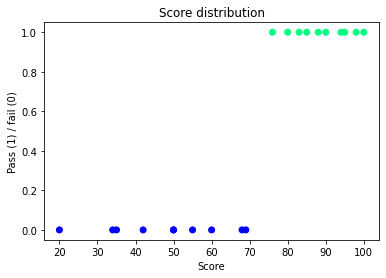

In [3]:
plt.title('Score distribution')
plt.scatter(x, y, c=y, cmap='winter')
plt.xlabel('Score')
plt.ylabel('Pass (1) / fail (0)')
plt.show()

# Sigmoid function

In [4]:
def sigmoid(z):
    return 1/(1+np.e**(-z))

# Binary crossentropy loss function

Loss function:
![](https://miro.medium.com/max/875/1*h9idzK6YjMKKxfCl-Zq8eA.png)

Where y_hat is:
![](https://miro.medium.com/max/875/1*HwoyV8PkILVCSQdlc-VrrA.png)

Source: https://towardsdatascience.com/logistic-regression-from-scratch-69db4f587e17

In [5]:
def binary_crossentropy(y, yhat):
    no_of_samples = len(y)

    numerator_1 = y*np.log(yhat)
    numerator_2 = (1-y) * np.log(1-yhat)
    
    loss = -(np.sum(numerator_1 + numerator_2) / no_of_samples)
    
    return loss

# Weight and bias initialization

In [6]:
np.random.seed(22)
weight = np.random.uniform(low=-10, high=10)
bias = np.random.uniform(low=-10, high=10)
print('weight\t:', weight)
print('bias\t:', bias)

weight	: -5.8307892528231475
bias	: -0.3663787647326817


# Score distribution and sigmoid curve (using the initial random weight and bias

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


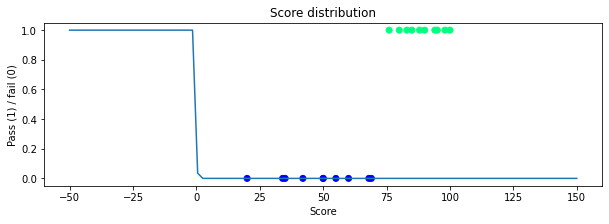

In [7]:
plt.figure(figsize=(10,3))
x_line = np.linspace(-50,150,100)
y_line = sigmoid(x_line*weight + bias)

plt.plot(x_line, y_line)
plt.scatter(x, y, c=y, cmap='winter')

plt.title('Score distribution')
plt.xlabel('Score')
plt.ylabel('Pass (1) / fail (0)')
plt.show()

# Initializing learning rate and epochs

In [8]:
L = 0.01
epochs = 40000

# Training

In [9]:
no_of_samples = len(x)

loss = []
for _ in range(epochs):
    yhat = sigmoid(x*weight + bias)
    loss.append(binary_crossentropy(y, yhat))
    
    # Partial derivative with the respect of w and b
    d_weight = np.sum(x *(yhat-y)) / no_of_samples
    d_bias = np.sum(yhat-y) / no_of_samples
    
    # Updating the value of w and b
    weight = weight - L*d_weight
    bias = bias - L*d_bias

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


In [10]:
print('weight\t:', weight)
print('bias\t:', bias)

weight	: 0.26399402758654456
bias	: -20.973990925981905


# The sigmoid curve created with trained weight and bias

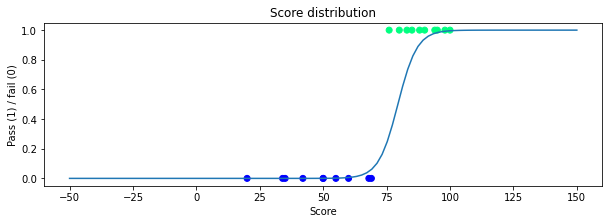

In [11]:
plt.figure(figsize=(10,3))
x_line = np.linspace(-50,150,100)
y_line = sigmoid(x_line*weight + bias)

plt.plot(x_line, y_line)
plt.scatter(x, y, c=y, cmap='winter')

plt.title('Score distribution')
plt.xlabel('Score')
plt.ylabel('Pass (1) / fail (0)')
plt.show()

# The loss decrease

Loss at the initial epoch	: 259.362
Loss at the last epoch		: 0.231


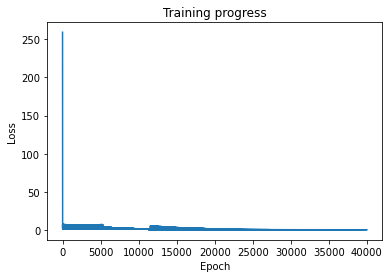

In [12]:
plt.plot(loss)
plt.title('Training progress')
plt.ylabel('Loss')
plt.xlabel('Epoch')

print('Loss at the initial epoch\t:', np.round(loss[0],3))
print('Loss at the last epoch\t\t:', np.round(loss[-1],3))

# Predicting

In [13]:
yhat = sigmoid(x*weight + bias)

print('prediction {}\t: {}--> {}'.format('i', 'output ', 'rounded'))
print('====================================')

for i in range(len(yhat)):
    print('prediction {}\t: {}\t--> {}'\
          .format(i, np.round(yhat[i], 2), np.round(yhat[i])))

prediction i	: output --> rounded
prediction 0	: 1.0	--> 1.0
prediction 1	: 0.99	--> 1.0
prediction 2	: 0.98	--> 1.0
prediction 3	: 0.54	--> 1.0
prediction 4	: 0.29	--> 0.0
prediction 5	: 0.81	--> 1.0
prediction 6	: 0.98	--> 1.0
prediction 7	: 0.72	--> 1.0
prediction 8	: 0.94	--> 1.0
prediction 9	: 0.91	--> 1.0
prediction 10	: 0.01	--> 0.0
prediction 11	: 0.0	--> 0.0
prediction 12	: 0.05	--> 0.0
prediction 13	: 0.06	--> 0.0
prediction 14	: 0.0	--> 0.0
prediction 15	: 0.0	--> 0.0
prediction 16	: 0.0	--> 0.0
prediction 17	: 0.0	--> 0.0
prediction 18	: 0.0	--> 0.0
prediction 19	: 0.0	--> 0.0
